In [ ]:
import pandas as pd

# Load the dataset
# file_path = "/mnt/data/heart.csv"
data = pd.read_csv("heart.csv")

data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   52    1   0       125   212    0        1      168      0      1.0      2   
 1   53    1   0       140   203    1        0      155      1      3.1      0   
 2   70    1   0       145   174    0        1      125      1      2.6      0   
 3   61    1   0       148   203    0        1      161      0      0.0      2   
 4   62    0   0       138   294    1        1      106      0      1.9      1   
 
    ca  thal  target  
 0   2     3       0  
 1   0     3       0  
 2   0     3       0  
 3   1     3       0  
 4   3     2       0  )

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Identify numerical and categorical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Normalize numerical features
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Check the first few rows of the preprocessed data
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1,0,0.292453,0.196347,0,1,0.740458,0,0.161290,2,2,3
1,0.500000,1,0,0.433962,0.175799,1,0,0.641221,1,0.500000,0,0,3
2,0.854167,1,0,0.481132,0.109589,0,1,0.412214,1,0.419355,0,0,3
3,0.666667,1,0,0.509434,0.175799,0,1,0.687023,0,0.000000,2,1,3
4,0.687500,0,0,0.415094,0.383562,1,1,0.267176,0,0.306452,1,3,2


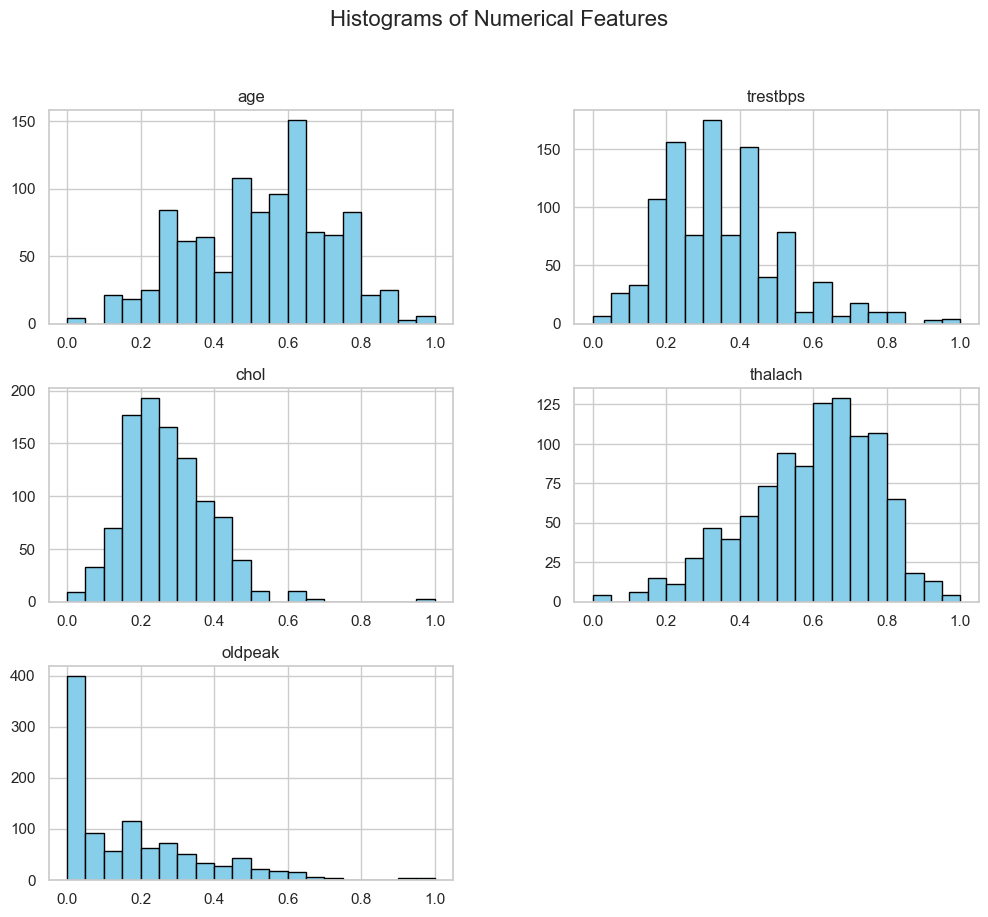

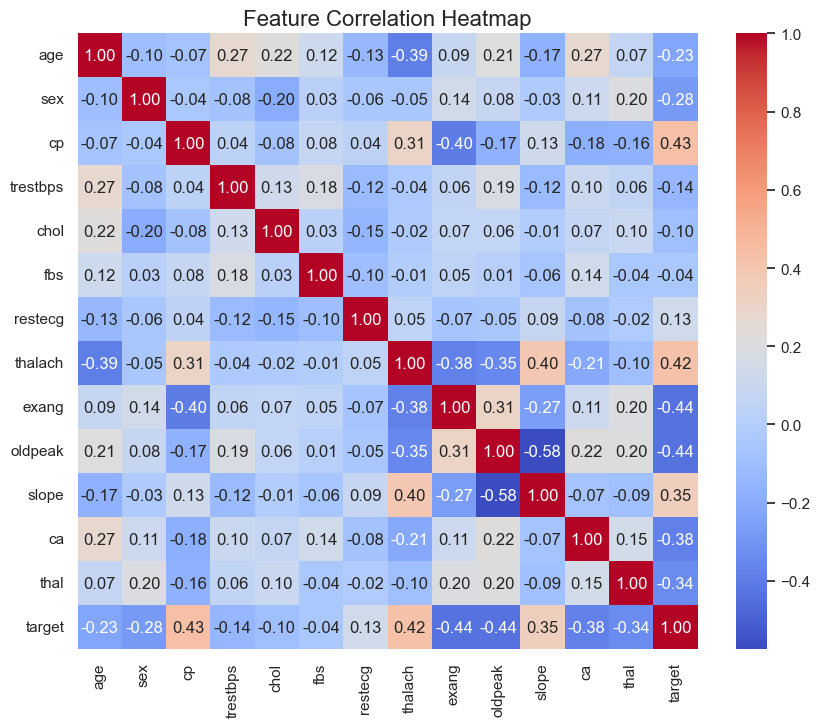

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot histograms for numerical features
X[numerical_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# Plot heatmap to show correlations
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions
logistic_preds = logistic_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

logistic_metrics = evaluate_model(y_test, logistic_preds)
rf_metrics = evaluate_model(y_test, rf_preds)
svm_metrics = evaluate_model(y_test, svm_preds)

logistic_metrics, rf_metrics, svm_metrics


({'Accuracy': 0.827922077922078,
  'Precision': np.float64(0.8070175438596491),
  'Recall': np.float64(0.8734177215189873),
  'F1-Score': np.float64(0.8389057750759878)},
 {'Accuracy': 0.9902597402597403,
  'Precision': np.float64(1.0),
  'Recall': np.float64(0.9810126582278481),
  'F1-Score': np.float64(0.9904153354632588)},
 {'Accuracy': 0.8441558441558441,
  'Precision': np.float64(0.8055555555555556),
  'Recall': np.float64(0.9177215189873418),
  'F1-Score': np.float64(0.8579881656804734)})